# Analysis of links between global warming and wildfire in USA

## Initial data import
Data from NOAA National Centers for Environmental information, Climate at a Glance: Statewide Time Series, published April 2022, retrieved on April 16, 2022 from https://www.ncdc.noaa.gov/cag/

Data contain average temperature per year between 1992 and 2015 and departure from mean (1901-2000)

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import all the csv for each state
alabama = pd.read_csv('alabama.csv', header=4)
alaska = pd.read_csv('alaska.csv', header=4)
arizona = pd.read_csv('arizona.csv', header=4)
arkansas = pd.read_csv('arkansas.csv', header=4)
california = pd.read_csv('california.csv', header=4)
colorado = pd.read_csv('colorado.csv', header=4)
connecticut = pd.read_csv('connecticut.csv', header=4)
delaware = pd.read_csv('delaware.csv', header=4)
florida = pd.read_csv('florida.csv', header=4)
georgia = pd.read_csv('georgia.csv', header=4)
idaho = pd.read_csv('idaho.csv', header=4)
illinois = pd.read_csv('illinois.csv', header=4)
indiana = pd.read_csv('indiana.csv', header=4)
iowa = pd.read_csv('iowa.csv', header=4)
kansas = pd.read_csv('kansas.csv', header=4)
kentucky = pd.read_csv('kentucky.csv', header=4)
louisiana = pd.read_csv('louisiana.csv', header=4)
maine = pd.read_csv('maine.csv', header=4)
maryland = pd.read_csv('maryland.csv', header=4)
massachusetts = pd.read_csv('massachusetts.csv', header=4)
michigan = pd.read_csv('michigan.csv', header=4)
minnesota = pd.read_csv('minnesota.csv', header=4)
mississippi = pd.read_csv('mississippi.csv', header=4)
missouri = pd.read_csv('missouri.csv', header=4)
montana = pd.read_csv('montana.csv', header=4)
nebraska = pd.read_csv('nebraska.csv', header=4)
nevada = pd.read_csv('nevada.csv', header=4)
new_hampshire = pd.read_csv('new_hampshire.csv', header=4)
new_jersey = pd.read_csv('new_jersey.csv', header=4)
new_mexico = pd.read_csv('new_mexico.csv', header=4)
new_york = pd.read_csv('new_york.csv', header=4)
north_carolina = pd.read_csv('north_carolina.csv', header=4)
north_dakota = pd.read_csv('north_dakota.csv', header=4)
ohio = pd.read_csv('ohio.csv', header=4)
oklahoma = pd.read_csv('oklahoma.csv', header=4)
oregon = pd.read_csv('oregon.csv', header=4)
pennsylvania = pd.read_csv('pennsylvania.csv', header=4)
rhode_island = pd.read_csv('rhode_island.csv', header=4)
south_carolina = pd.read_csv('south_carolina.csv', header=4)
south_dakota = pd.read_csv('south_dakota.csv', header=4)
tennessee = pd.read_csv('tennessee.csv', header=4)
texas = pd.read_csv('texas.csv', header=4)
utah = pd.read_csv('utah.csv', header=4)
vermont = pd.read_csv('vermont.csv', header=4)
virginia = pd.read_csv('virginia.csv', header=4)
washington = pd.read_csv('washington.csv', header=4)
west_virginia = pd.read_csv('west_virginia.csv', header=4)
wisconsin = pd.read_csv('wisconsin.csv', header=4)

#creating a list of all states for later use
states = [alabama,
          alaska,
          arizona,
          arkansas,
          california,
          colorado,
          connecticut,
          delaware,
          florida,
          georgia,
          idaho,
          illinois,
          indiana,
          iowa,
          kansas,
          kentucky,
          louisiana,
          maine,
          maryland,
          massachusetts,
          michigan,
          minnesota,
          mississippi,
          missouri,
          montana,
          nebraska,
          nevada,
          new_hampshire,
          new_jersey,
          new_mexico,
          new_york,
          north_carolina,
          north_dakota,
          ohio,
          oklahoma,
          oregon,
          pennsylvania,
          rhode_island,
          south_carolina,
          south_dakota,
          tennessee,
          texas,
          utah,
          vermont,
          virginia,
          washington,
          west_virginia,
          wisconsin]

#cleaning of year
for state in states:
    state['Date'] = state['Date'].astype(str).apply(lambda date: date[:-2])

#seting list of state name
states_name = ['alabama',
          'alaska',
          'arizona',
          'arkansas',
          'california',
          'colorado',
          'connecticut',
          'delaware',
          'florida',
          'georgia',
          'idaho',
          'illinois',
          'indiana',
          'iowa',
          'kansas',
          'kentucky',
          'louisiana',
          'maine',
          'maryland',
          'massachusetts',
          'michigan',
          'minnesota',
          'mississippi',
          'missouri',
          'montana',
          'nebraska',
          'nevada',
          'new_hampshire',
          'new_jersey',
          'new_mexico',
          'new_york',
          'north_carolina',
          'north_dakota',
          'ohio',
          'oklahoma',
          'oregon',
          'pennsylvania',
          'rhode_island',
          'south_carolina',
          'south_dakota',
          'tennessee',
          'texas',
          'utah',
          'vermont',
          'virginia',
          'washington',
          'west_virginia',
          'wisconsin']

## Analysis of temperature rise

### By state

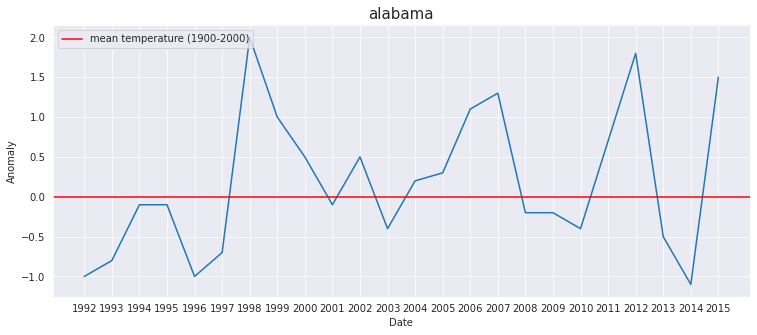

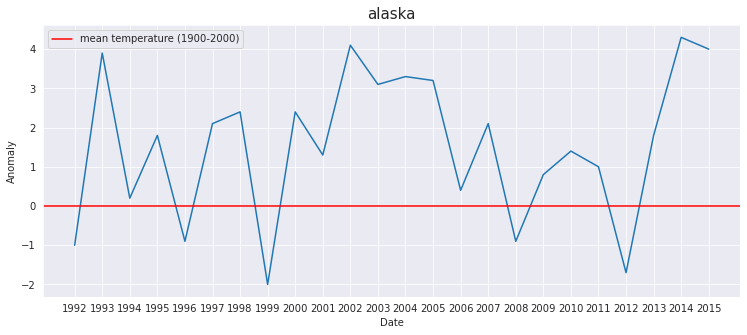

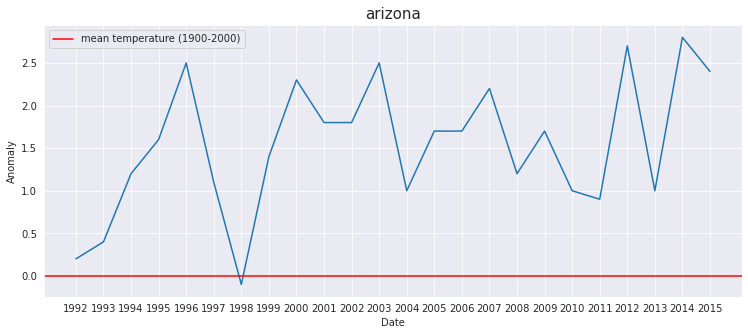

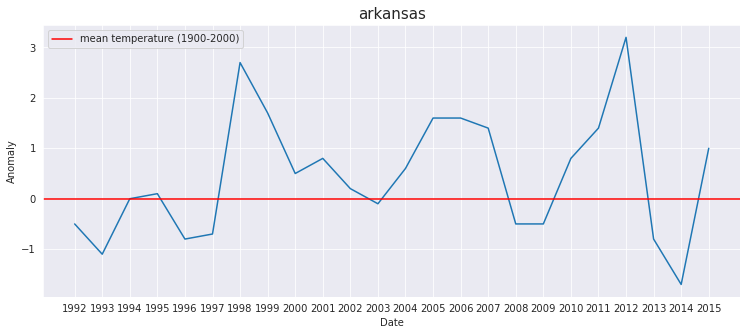

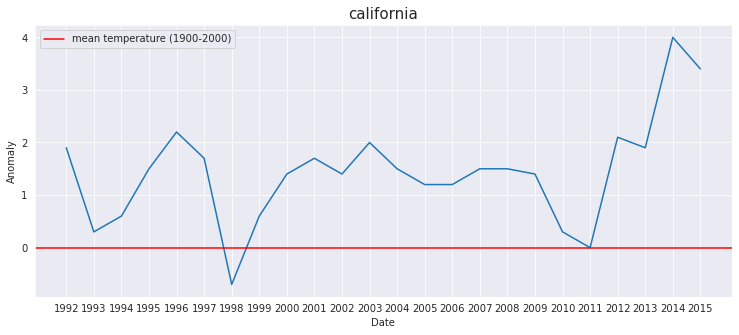

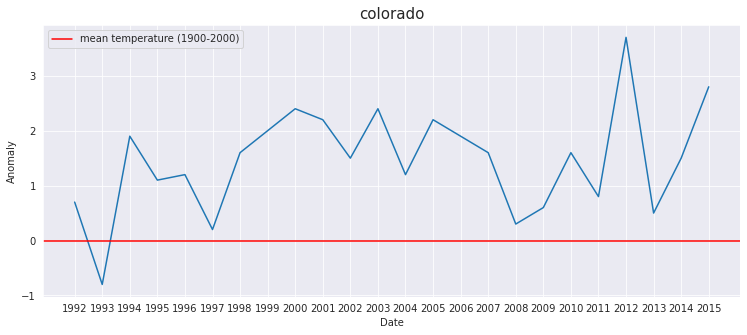

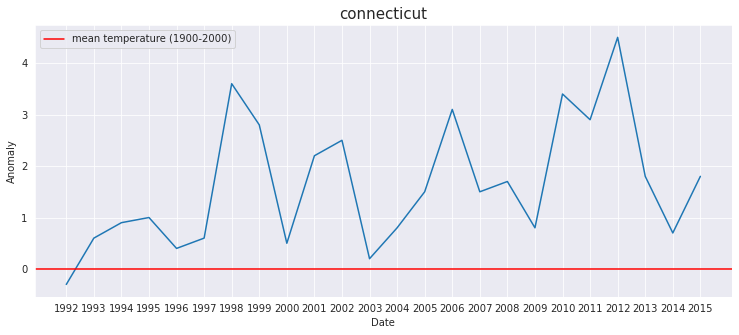

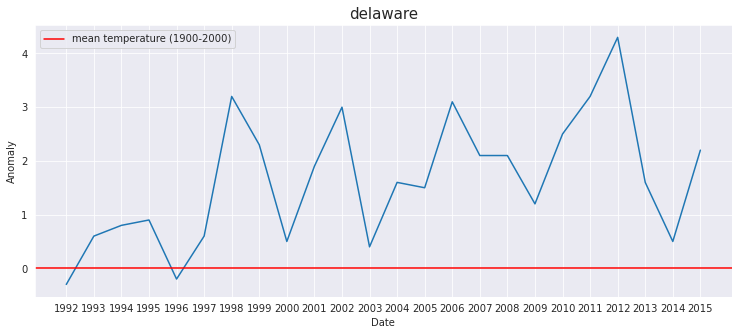

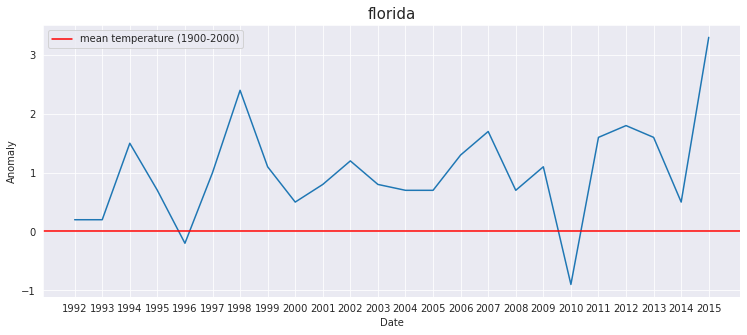

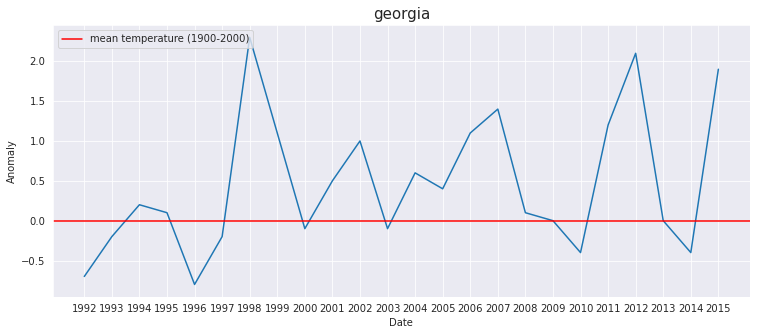

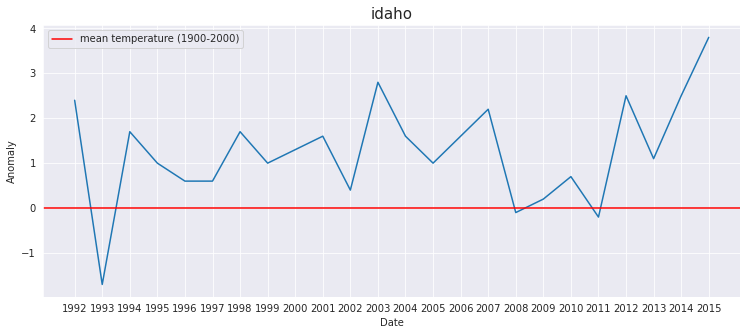

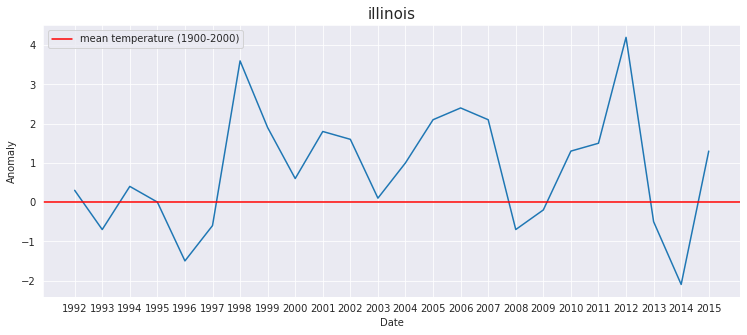

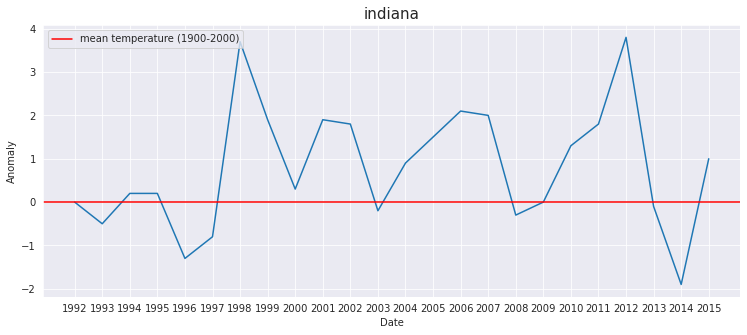

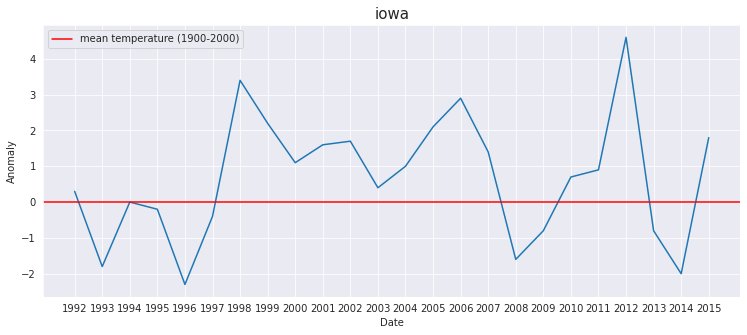

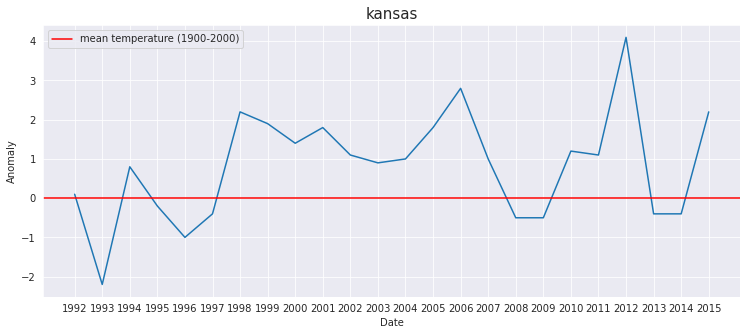

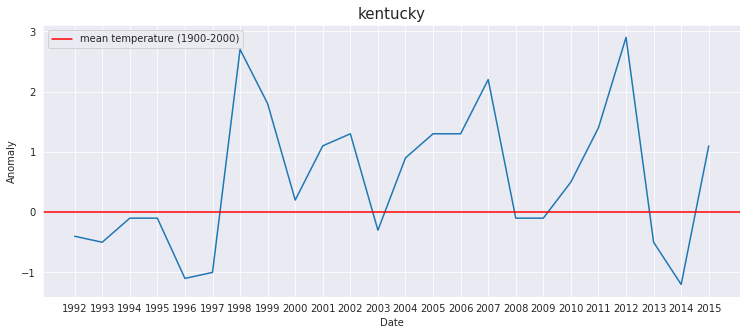

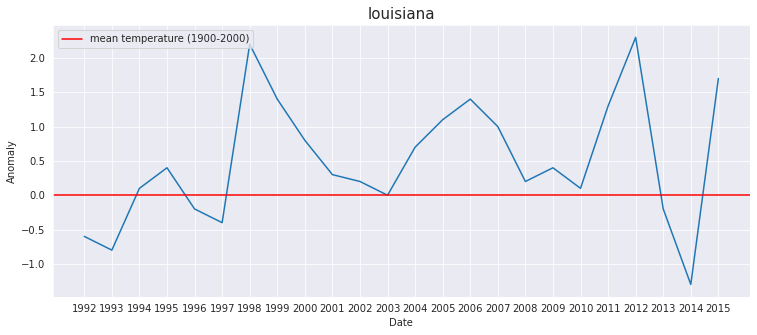

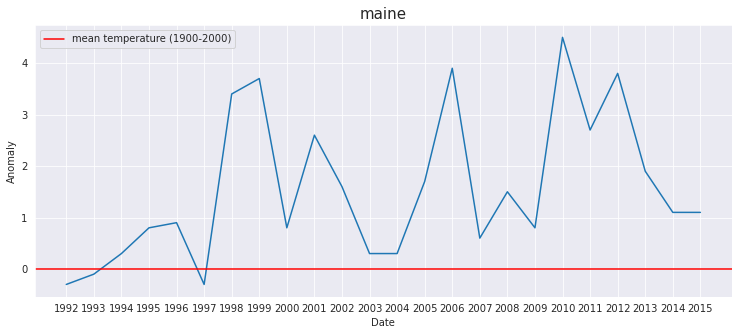

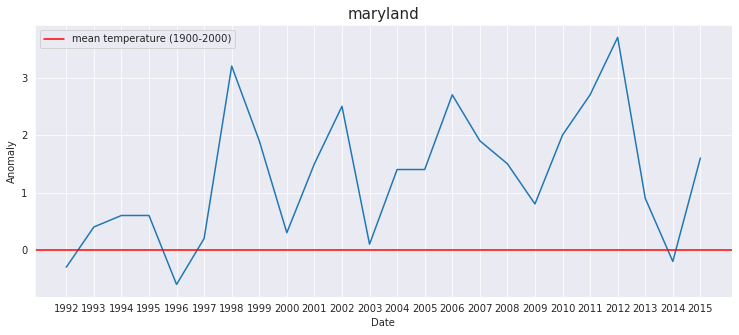

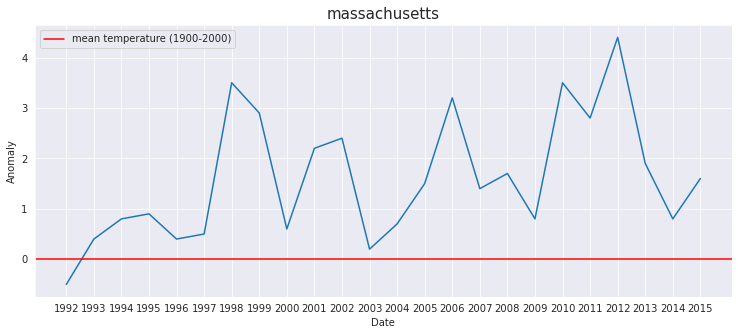

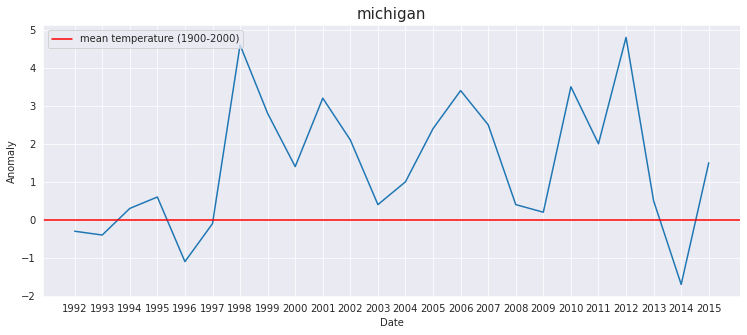

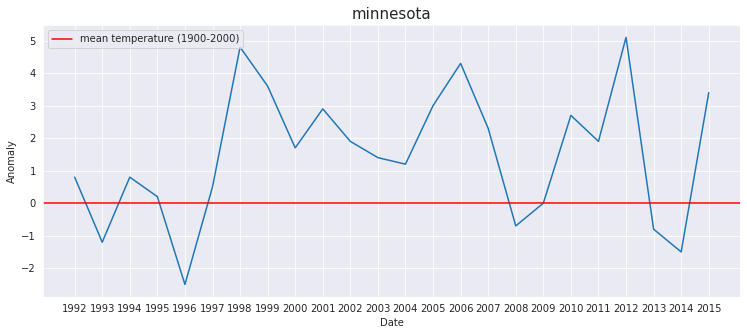

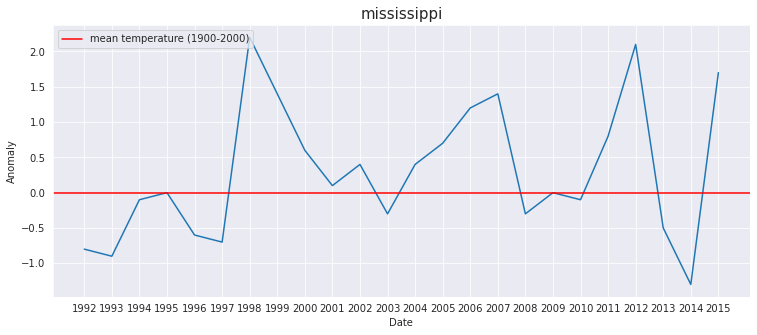

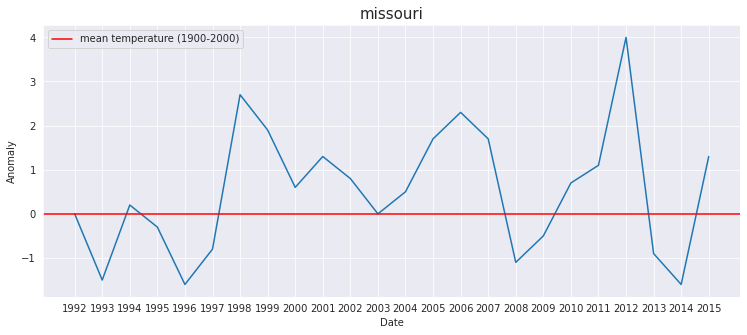

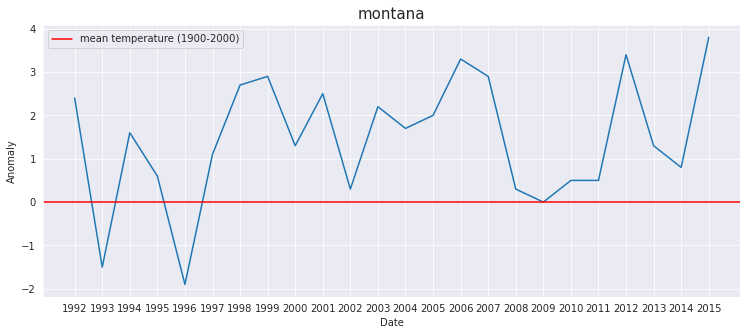

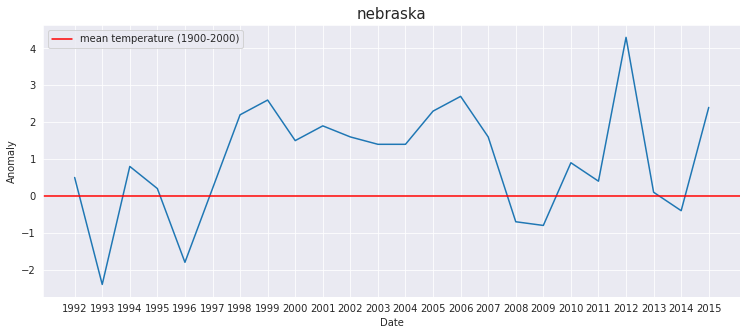

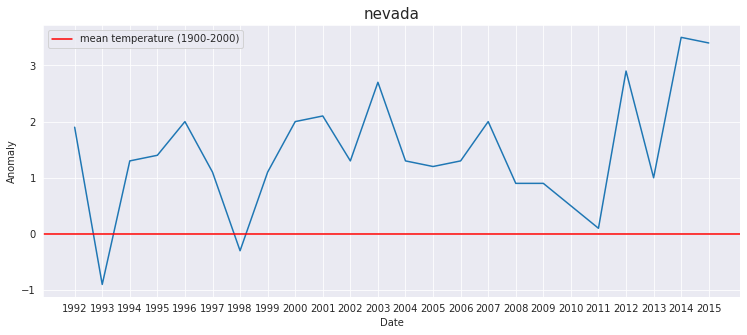

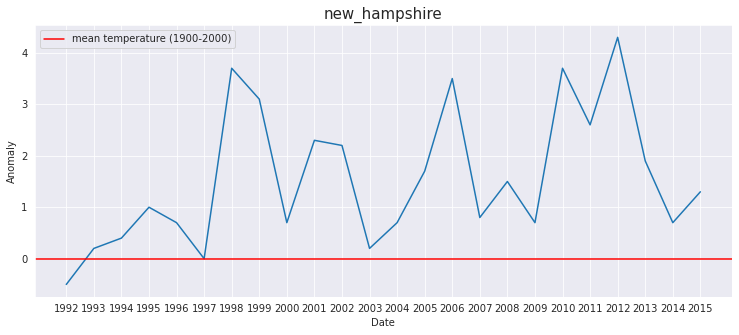

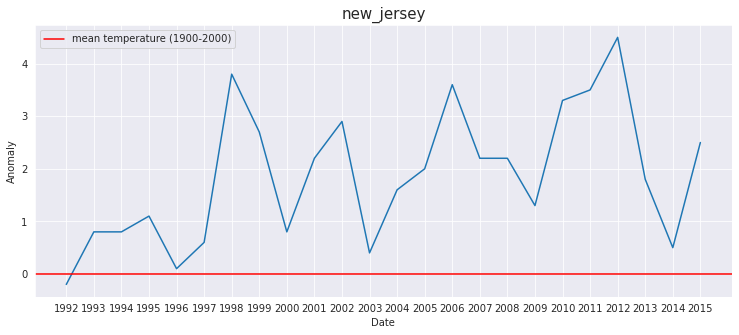

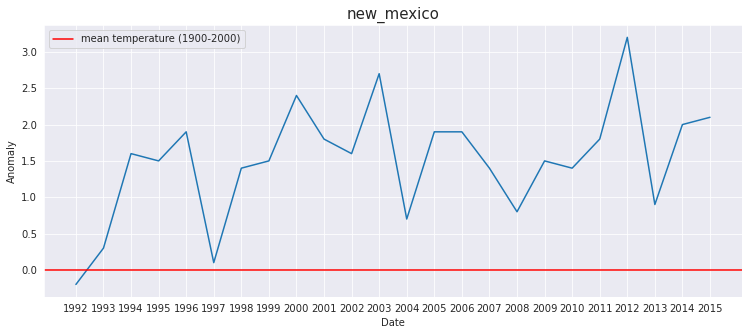

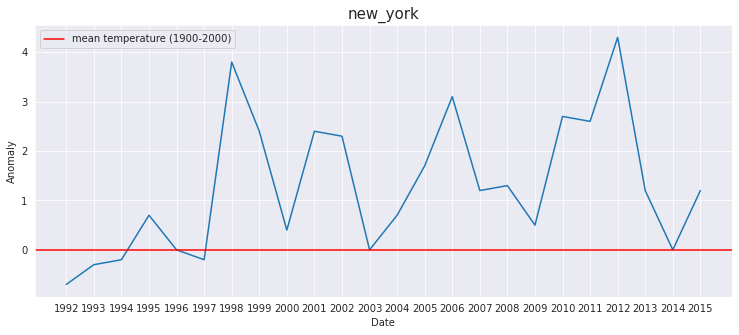

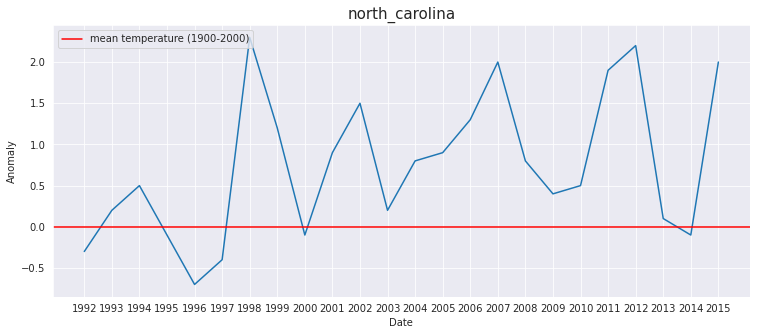

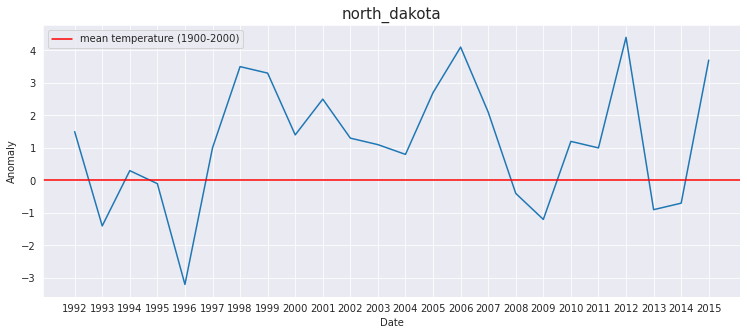

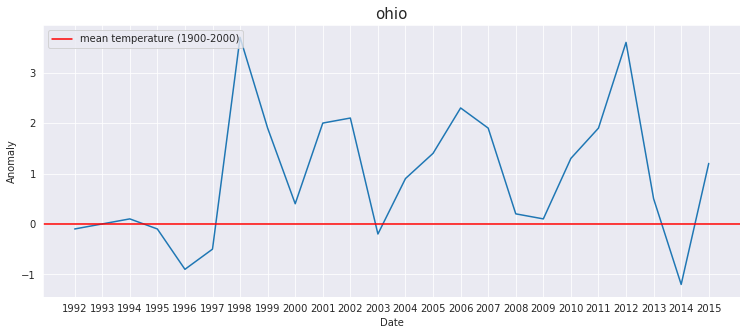

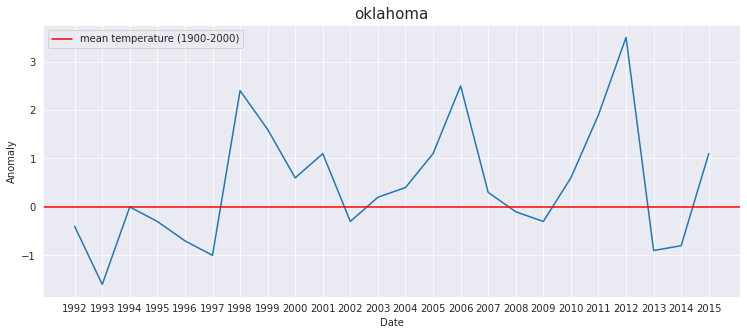

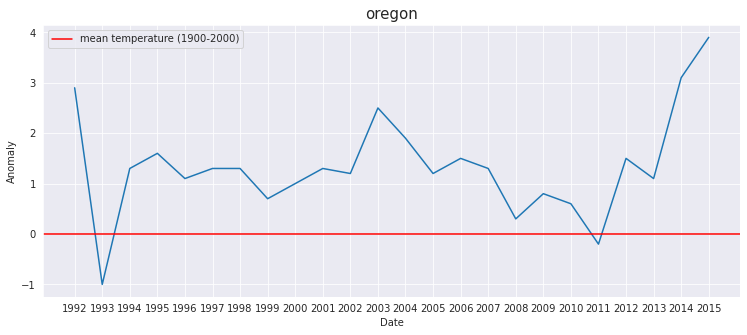

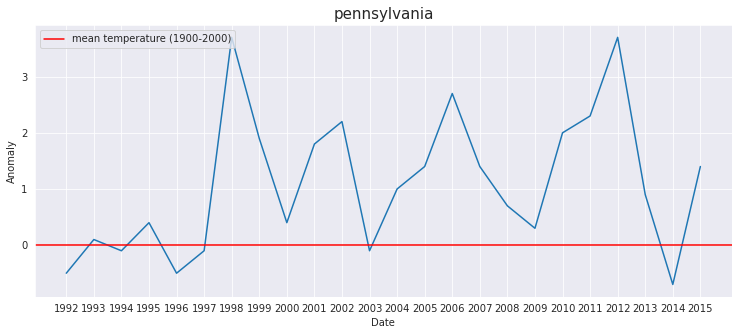

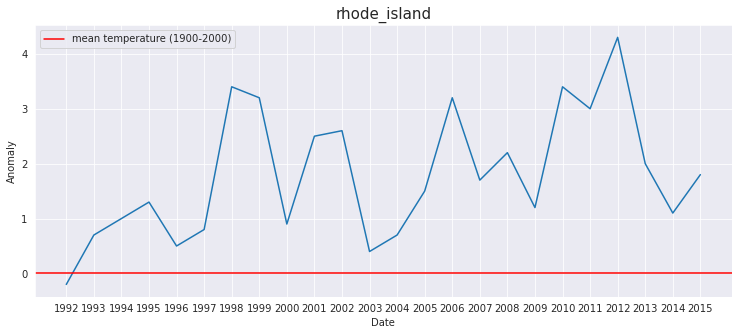

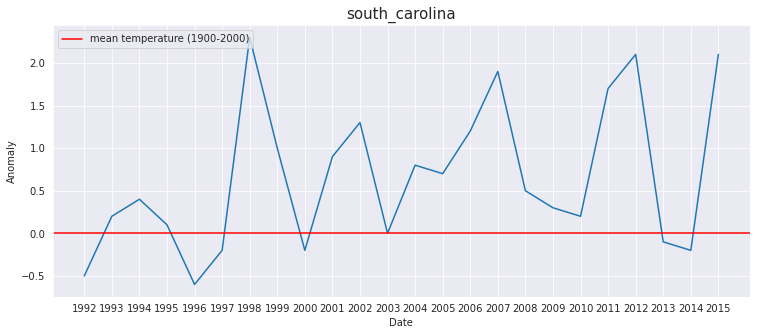

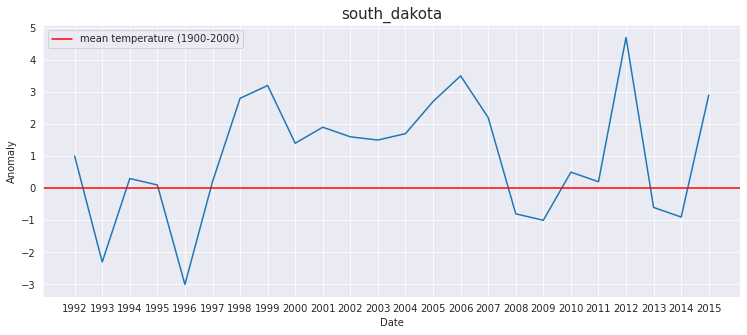

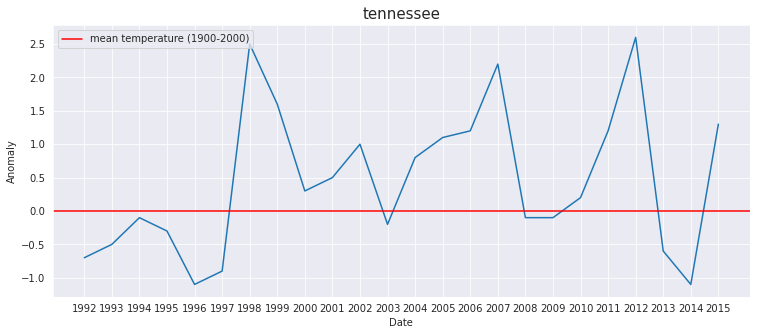

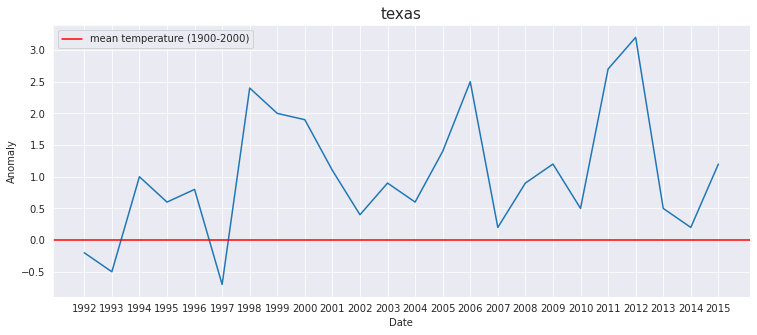

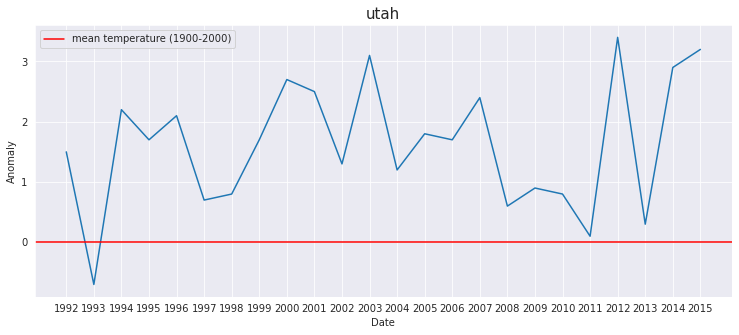

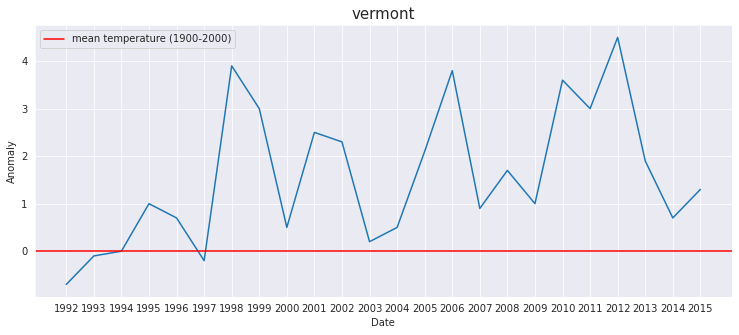

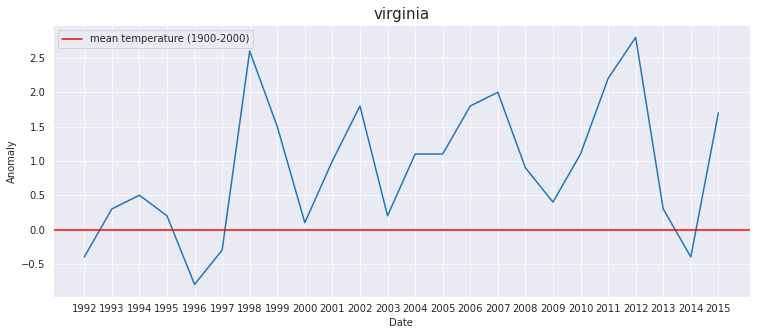

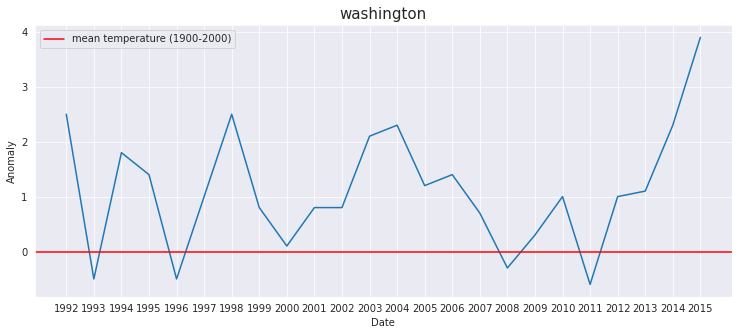

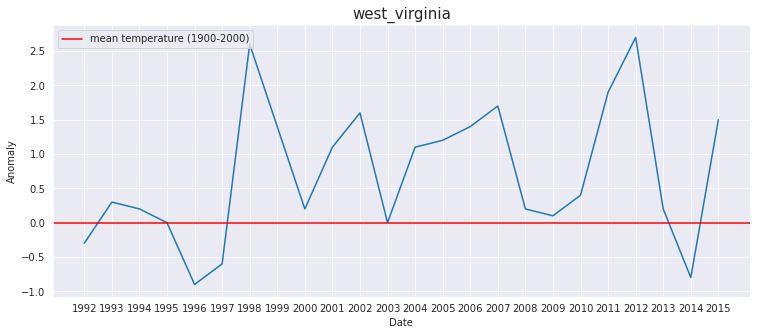

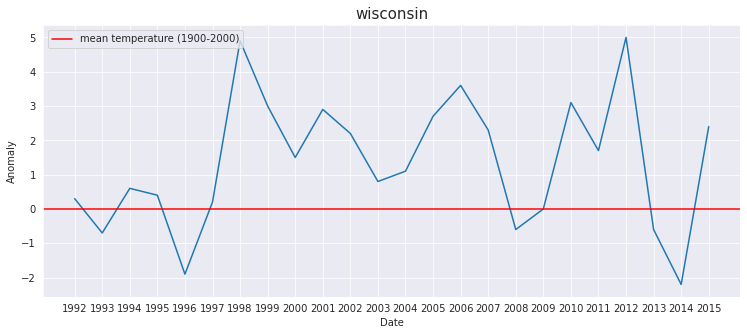

In [68]:
#creating a figure showing evolution of departure from mean through time
for state, state_name in zip(states, states_name):
    plt.figure(figsize=(5*2.5, 5))
    plt.title(state_name, fontsize=15)
    sns.lineplot(x = 'Date', y = 'Anomaly', data = state,)
    plt.axhline(y = 0, color='red', label='mean temperature (1900-2000)') #highlighting the base lign of what the temperature should be close to
    plt.legend(loc='upper left')
    plt.show()

### At country level

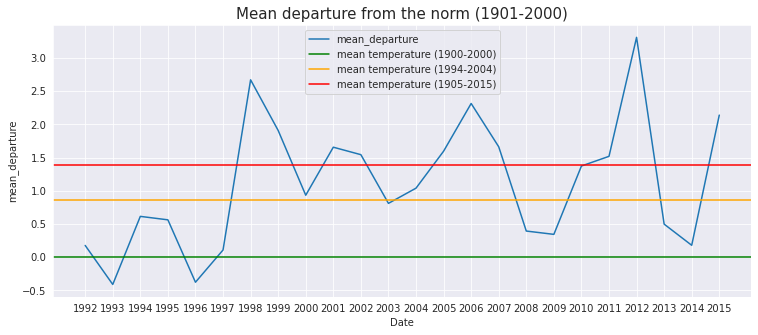

In [9]:
df_departure = pd.DataFrame(columns=states_name) #creating nation dataframe for mean departure, index is date

#adding anomaly from each state
for state, state_name in zip(states, states_name):
    df_departure[state_name] = state['Anomaly']

#geting mean statewide for each year
df_departure['mean_departure'] = df_departure.mean(axis=1)

#seting date as index
df_departure.set_index(alabama.Date, inplace=True)

#caculating mean for both decade in the time frame
mean_1994_2004 = df_departure.loc['1992':'2004', 'mean_departure'].mean()
mean_2005_2015 = df_departure.loc['2005':'2015', 'mean_departure'].mean()

#putting those state into a graph
plt.figure(figsize=(5*2.5, 5))
plt.title('Mean departure from the norm (1901-2000)', fontsize=15)
sns.lineplot(x = df_departure.index, y = 'mean_departure', data = df_departure, label='mean_departure')
plt.axhline(y = 0, color='green', label='mean temperature (1900-2000)')
plt.axhline(y = mean_1994_2004, color='orange', label='mean temperature (1994-2004)')
plt.axhline(y = mean_2005_2015, color='red', label='mean temperature (1905-2015)')
plt.legend()
plt.show()

It was already clear from the perspective of each state, but a the global point of view, the US are *burning*

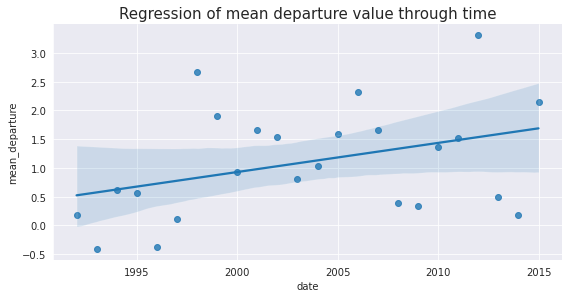

In [10]:
df_departure['date'] = df_departure.index #add date colum for the need of lmplot
df_departure['date'] = df_departure['date'].astype(int) #set date to int for the need of lmplot
df_departure['mean_departure'] = df_departure['mean_departure'].astype(float) #set anomaly to float
regression = sns.lmplot(x = 'date', y='mean_departure', data=df_departure, height=4, aspect=2);
regression = plt.gca() #change the facet grid to plot with gca which get the last axes
regression.set_title('Regression of mean departure value through time', fontsize=15); #set title

The more the time pass, the bigger the anomaly are getting...

## Correlation with wildfires

In [11]:
df_fire = pd.read_csv("fires.csv")
type = {"FIRE_CODE" : "str", "FIRE_NAME" : "str", "STATE" : "str"} #mixed type management
df_fire = df_fire.astype(type)

/home/coin/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
#keeping only the used columns
df_fire_stats = df_fire[['FIRE_SIZE','STATE','STAT_CAUSE_DESCR','FIRE_YEAR']]

# Grouping by year to link to the temperature table
fnc_apply = {'FIRE_SIZE':'sum', 'STATE':'count'}
fire_size = df_fire_stats.groupby('FIRE_YEAR').agg(fnc_apply)

#conversion of the size to hectare
fire_size['FIRE_SIZE'] = fire_size['FIRE_SIZE'].apply(lambda x: x*0.404686)
fire_size.rename(columns={'STATE' : 'FREQUENCY'}, inplace=True) #polishing column name

#getion area burn per fire ratio
fire_size['BURN_AREA_RATIO'] = fire_size['FIRE_SIZE']/fire_size['FREQUENCY']

#add date colum for the need of lmplot
fire_size['date'] = fire_size.index


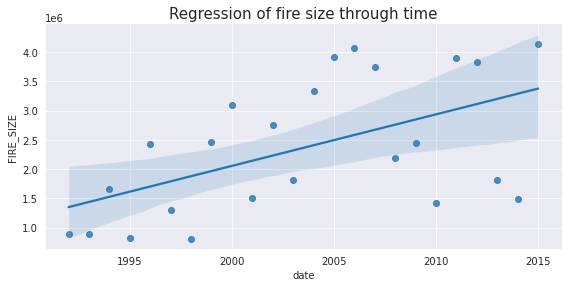

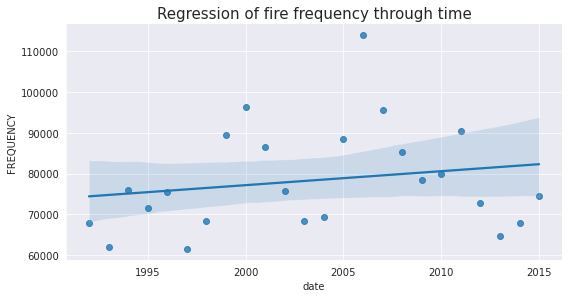

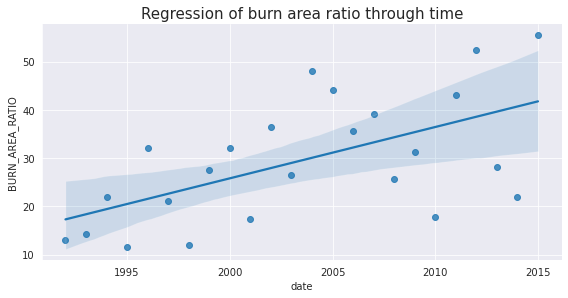

In [26]:
regression = sns.lmplot(x = 'date', y='FIRE_SIZE', data=fire_size, height=4, aspect=2);
regression = plt.gca() #change the facet grid to plot with gca which get the last axes
regression.set_title('Regression of fire size through time', fontsize=15); #set title

regression = sns.lmplot(x = 'date', y='FREQUENCY', data=fire_size, height=4, aspect=2);
regression = plt.gca() #change the facet grid to plot with gca which get the last axes
regression.set_title('Regression of fire frequency through time', fontsize=15); #set title

regression = sns.lmplot(x = 'date', y='BURN_AREA_RATIO', data=fire_size, height=4, aspect=2);
regression = plt.gca() #change the facet grid to plot with gca which get the last axes
regression.set_title('Regression of burn area ratio through time', fontsize=15); #set title

Notably fire are getting bigger and slightly more numerous

In [50]:
df_temp = pd.DataFrame(columns=states_name) #creating nation dataframe for mean temperature, index is date

#adding mean temperature from each state
for state, state_name in zip(states, states_name):
    df_temp[state_name] = state['Value']

#geting mean temperature statewide for each year
df_temp['mean_temperature'] = df_temp.mean(axis=1)

#seting date as index
df_temp.set_index(alabama.Date, inplace=True)

#merging with fire stats
df_temp_fires = fire_size[['FIRE_SIZE', 'FREQUENCY', 'BURN_AREA_RATIO']]
df_temp_fires.set_index(alabama.Date, inplace=True)
df_temp_fires['mean_temperature'] = df_temp['mean_temperature']
df_temp_fires['mean_anomaly'] = df_departure['mean_departure']

/tmp/ipykernel_128730/2653312650.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_fires['mean_temperature'] = df_temp['mean_temperature']
/tmp/ipykernel_128730/2653312650.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_fires['mean_anomaly'] = df_departure['mean_departure']


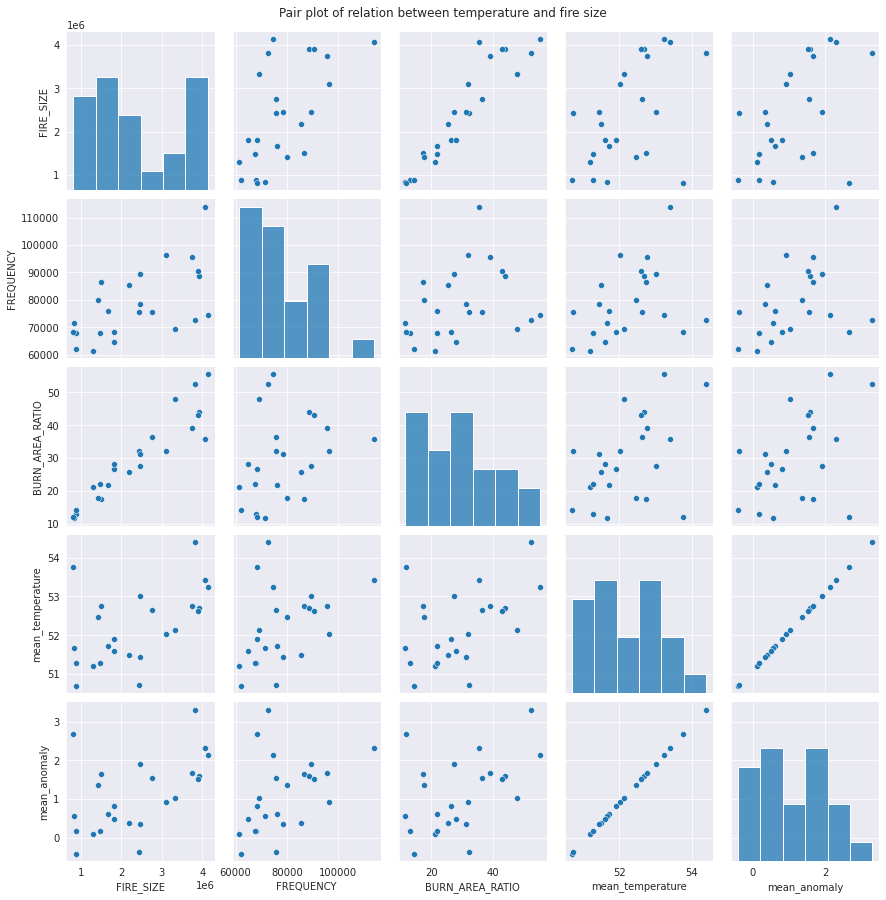

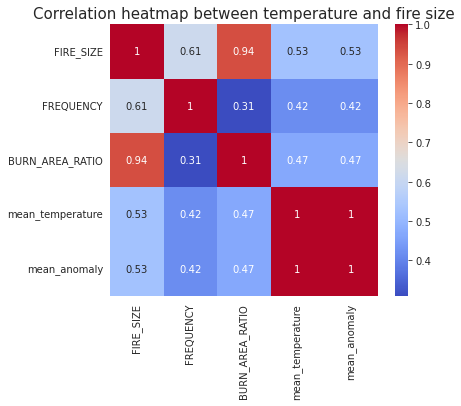

In [65]:
pair_plot = sns.pairplot(df_temp_fires)
pair_plot.fig.suptitle('Pair plot of relation between temperature and fire size', y=1)

plt.figure(figsize=(6,5))
sns.heatmap(df_temp_fires.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation heatmap between temperature and fire size', fontsize=15);

The correlation between fire size and temperature is quite weak, but the dataset of 22 years is probably not enough to find a link, especially for such geological-time kind of event. The year 2014 was one of the coldest of the series, it as a big impact on the global average. Nonetheless, global-warming is happening fast enough to induce a 53% correlation rate on fire size, if we can assume there is a causality here.
